In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

def run_parameter_sweep(num_samples=2000, num_reruns=2, num_sims=5, num_timesteps=500, output_dir="./results"):
    """Run the parameter sweep using the C++ executable"""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get the absolute path to the executable
    current_dir = os.getcwd()
    project_root = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(current_dir))))
    executable_path = os.path.join(current_dir, "build", "bin", "parameter_sweep")
    
    print(f"Looking for executable at: {executable_path}")
    if not os.path.exists(executable_path):
        raise FileNotFoundError(f"Parameter sweep executable not found at: {executable_path}")
    
    # Run the parameter sweep executable
    cmd = [
        executable_path,
        "--samples", str(num_samples),
        "--reruns", str(num_reruns),
        "--sims", str(num_sims),
        "--timesteps", str(num_timesteps),
        "--output", output_dir
    ]
    
    print(f"Running command: {' '.join(cmd)}")
    subprocess.run(cmd, check=True)
    
    # Find the CSV file in the output directory
    csv_files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in output directory")
    
    # Read the most recent CSV file
    latest_csv = max(csv_files, key=lambda x: os.path.getctime(os.path.join(output_dir, x)))
    return pd.read_csv(os.path.join(output_dir, latest_csv))

# 1 - Run the Sweep. 
The data is saved inside a Pandas DataFrame

In [4]:
# df = run_parameter_sweep()
# We just load the data from the file insteaed of running the sweep again. 
df = pd.read_csv("/Users/UM/Documents/UM25/Learning/MV/results/sweep_20250403_153901.csv") 

# 2 - Plot results

In [5]:
    
plt.style.use('seaborn-v0_8')
df.head()

,sample,nr,dr,df,rf,avg_prey,std_prey,avg_predators,std_predators,normalized_prey
0,0,432,0.85250,0.146250,0.35225,432.0,0.0000,0.0,0.000000,1.000000
1,1,305,0.84175,0.170625,0.50550,305.0,0.0000,0.0,0.000000,1.000000
2,2,655,0.60925,0.138000,0.66700,364.7,12.0208,83.2,0.565685,0.556794
3,3,598,0.59050,0.042500,0.54525,83.9,86.1256,22.7,8.626700,0.140301
4,4,314,0.92025,0.028375,0.29525,111.0,46.1034,55.8,7.353910,0.353503


## Histograms

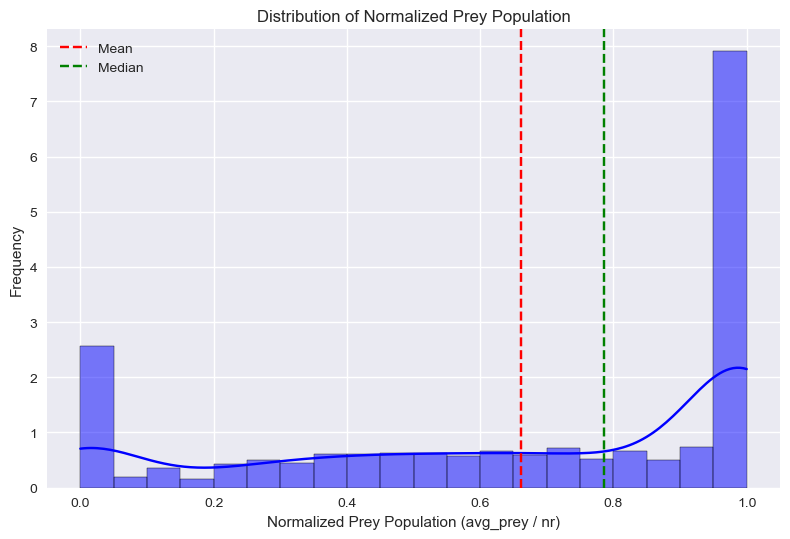

In [ ]:
sns.histplot(df['normalized_prey'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['normalized_prey'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized_prey'].median(), color='green', linestyle='--', label='Median')
# plt.hist(df['normalized_prey'].to_numpy(), bins='auto', color='blue')

plt.xlabel('Normalized Average Prey Population (avg_prey / nr)')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Average Prey Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/normalized_prey_distribution.png", dpi=300)
plt.show()


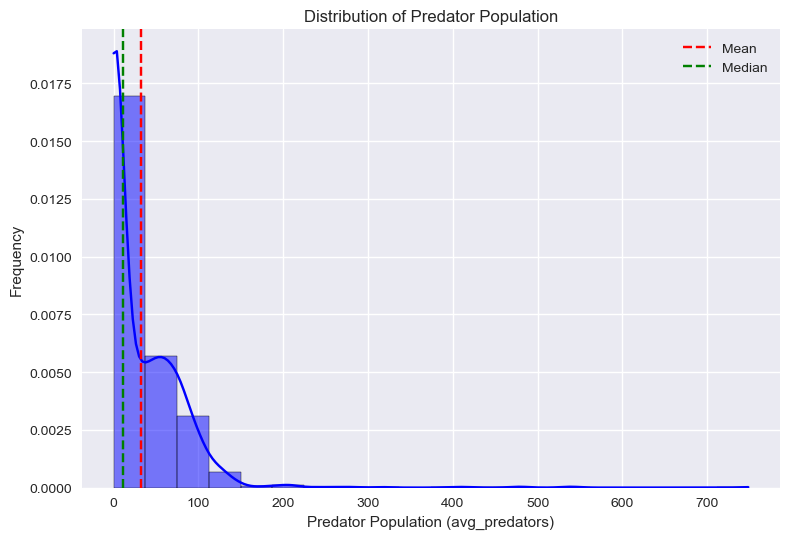

In [50]:
sns.histplot(df['avg_predators'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['avg_predators'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['avg_predators'].median(), color='green', linestyle='--', label='Median')

plt.xlabel('Predator Population (avg_predators)')    
plt.ylabel('Frequency')
plt.title('Distribution of Predator Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/average_predator_distribution.png", dpi=300)
plt.show()

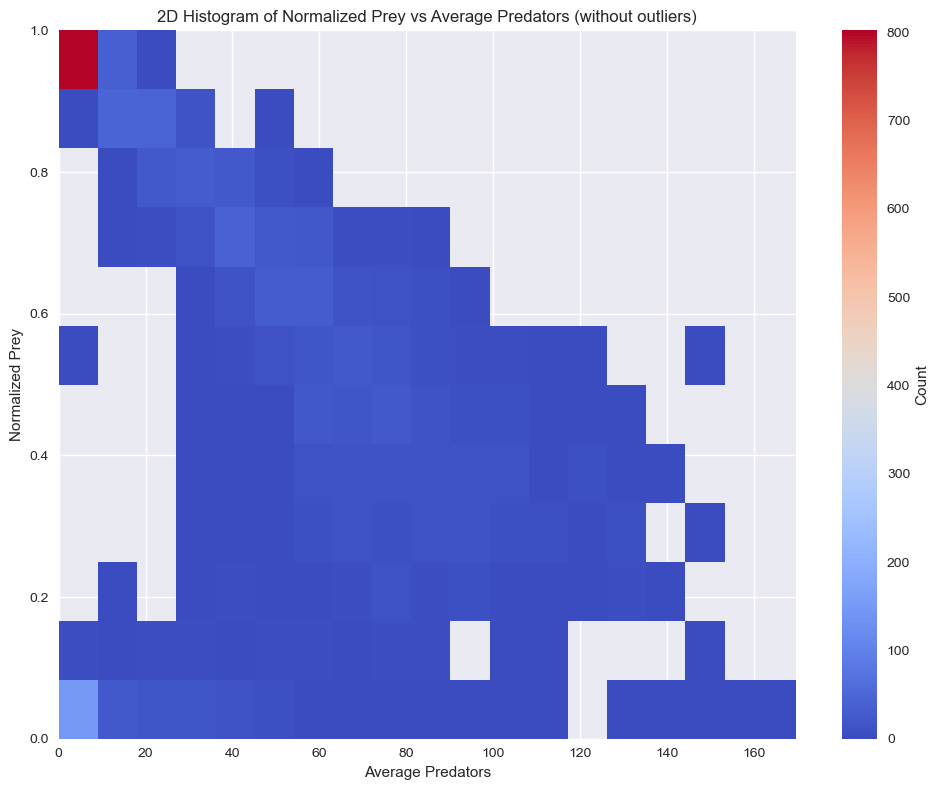

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentile thresholds (e.g., exclude top 1%)
lower_pred = df['avg_predators'].quantile(0.00)  # Include all lower values
upper_pred = df['avg_predators'].quantile(0.99)  # Exclude top 1%
lower_prey = df['normalized_prey'].quantile(0.00) 
upper_prey = df['normalized_prey'].quantile(0.99)

plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x='avg_predators',
    y='normalized_prey',
    bins='auto',
    cmap='coolwarm',
    cbar=True,
    cbar_kws={'label': 'Count'},
)

# Set axis limits after creating the plot
plt.xlim(lower_pred, upper_pred)
plt.ylim(lower_prey, upper_prey)

plt.title('2D Histogram of Normalized Average Prey vs Average Predators (without outliers)')
plt.xlabel('Average Predators')
plt.ylabel('Normalized Average Prey')
plt.tight_layout()
plt.show()

## Heatmaps
We plot heatmaps of each parameter against population averages. 

### Normalized Prey Population vs NR, DF, DR, RF

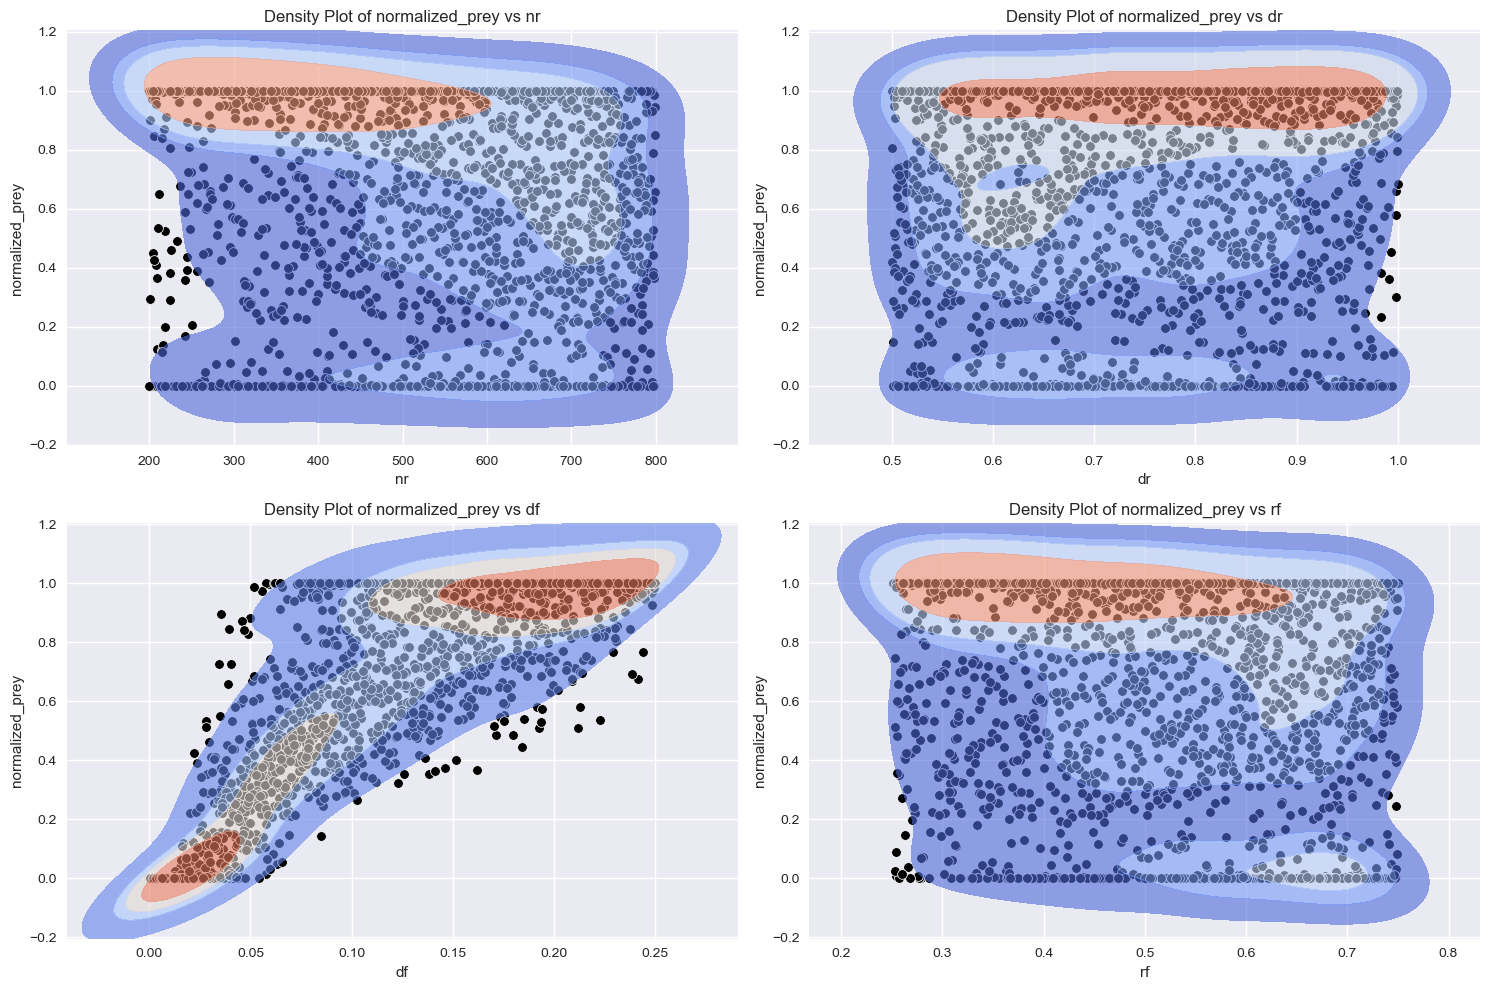

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']
# Create a scatter plot with a density plot overlay

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="normalized_prey",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="normalized_prey",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="coolwarm",
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('normalized_prey')
    ax.set_title(f'Density Plot of normalized_prey vs {param}')
plt.tight_layout()
plt.savefig("./results/normalized_prey_vs_params.png", dpi=300)
plt.show()

### Predator Population vs NR, DF, DR, RF

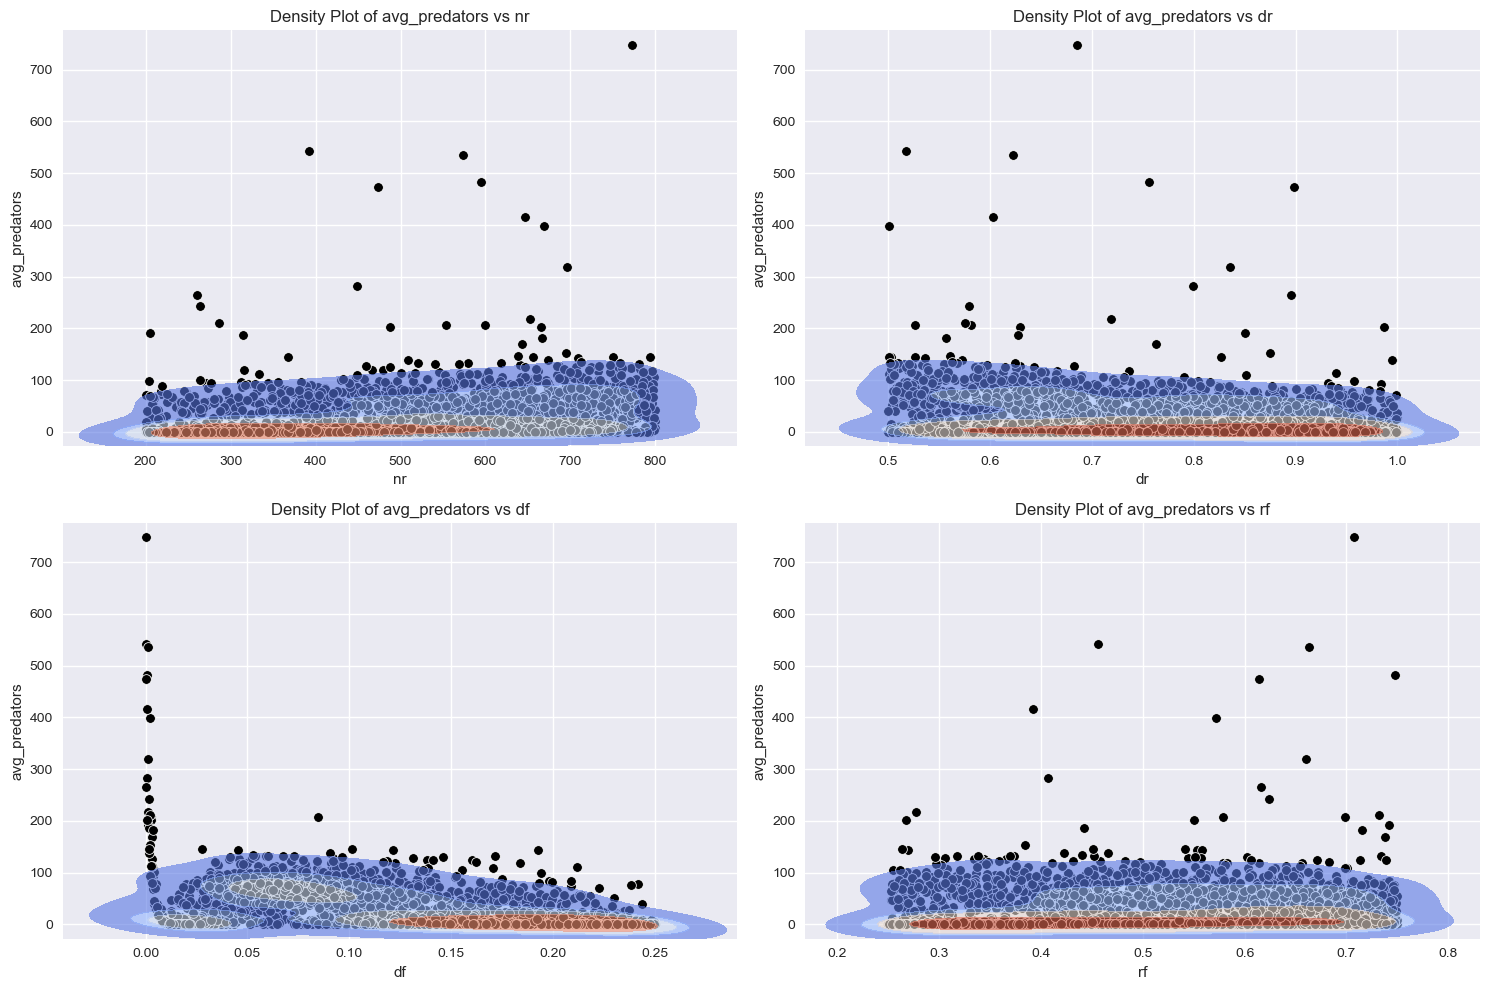

In [89]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="avg_predators",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="avg_predators",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="coolwarm",
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('avg_predators')
    ax.set_title(f'Density Plot of avg_predators vs {param}')
plt.tight_layout()
plt.savefig("./results/avg_predators_vs_params.png", dpi=300)
plt.show()

## Two Parameter Heatmaps


/var/folders/mx/slrd_4mx3r71wjgg45nvz53w0000gr/T/ipykernel_55633/35344035.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['dr_bin', 'df_bin'])['normalized_prey'].mean().unstack()


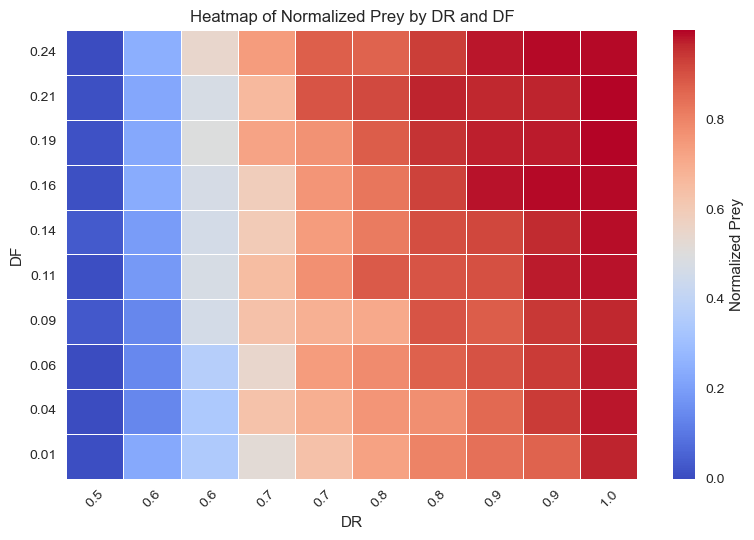

In [ ]:
# First, we need to pivot the data into a matrix suitable for a heatmap
df['dr_bin'] = pd.cut(df['dr'], bins=10)  # 20 bins for DR
df['df_bin'] = pd.cut(df['df'], bins=10)  # 20 bins for DF

# Get the midpoints for labels
dr_midpoints = [(interval.left + interval.right)/2 for interval in df['dr_bin'].cat.categories]
df_midpoints = [(interval.left + interval.right)/2 for interval in df['df_bin'].cat.categories]

# Group by the bins and calculate the mean of normalized_prey for each bin
heatmap_data = df.groupby(['dr_bin', 'df_bin'])['normalized_prey'].mean().unstack()


# Create the heatmap
sns.heatmap(heatmap_data, 
            cmap='coolwarm',  # Color map
            # annot=True,      # Display values in cells
            fmt='.2f',       # Format for the annotations
            linewidths=0.5,  # Width of the lines that divide each cell
            cbar_kws={'label': 'Normalized Average Prey'},
            )

# Set x and y tick labels to the midpoints (rounded for clarity)
plt.xticks(np.arange(len(dr_midpoints)) + 0.5, [f"{x:.1f}" for x in dr_midpoints], rotation=45)
plt.yticks(np.arange(len(df_midpoints)) + 0.5, [f"{y:.2f}" for y in df_midpoints])

# Add title and labels
plt.title('Heatmap of Normalized Average Prey by DR and DF')
plt.xlabel('DR')
plt.ylabel('DF')

# Display the plot
plt.gca().invert_yaxis() # Default y-axis is inverted
plt.tight_layout()
plt.show()

## Correlation Coefficients Heatmap

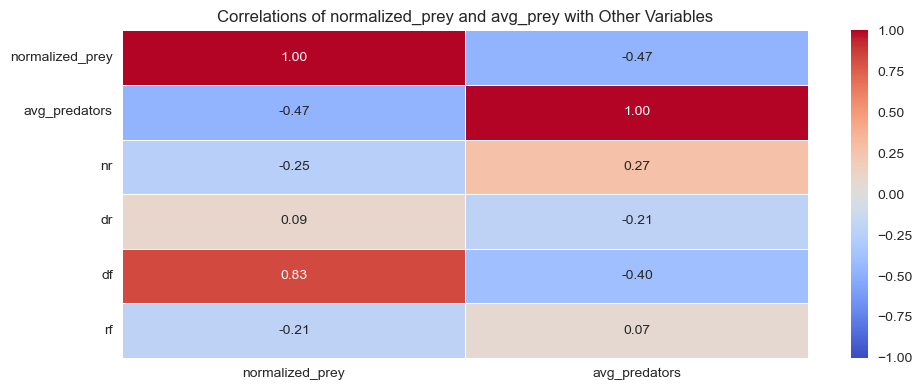

In [ ]:

selected_columns = ['normalized_prey', 'avg_predators', 'nr', 'dr', 'df', 'rf']
correlation_matrix = df[selected_columns].corr().transpose()

# Select only the rows for normalized_prey and avg_prey
specific_correlations = correlation_matrix.loc[:,['normalized_prey', 'avg_predators']]

# Create the figure
plt.figure(figsize=(10, 4))

# Create the heatmap
sns.heatmap(specific_correlations, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title('Correlations of normalized_prey and avg_prey with Other Variables')
plt.tight_layout()
plt.show()

# Discussion
## 1D - Sampling parameter space and uncertainty quantification
The data behaves more or less as expected. One very surprising observation is that the `normalized prey` vs `df` scatterplot has a relatively high density near the bottom left corner! We see a very strong correlation between `df` and `avg_predators` in the correlation heatmap, so this bottom-left accumulation has to come from a mitigating parameter -- or combination thereof. From the 2D parameter heatmap, it seems like this pool may be caused by high values of NR. 

Just as before, looking at means can distort data in ways that make it hard to spot trends. In particular, it is pretty clear from scatter plots that fox populations seem concentrated towards the bottom of the population interval across all parameters. The median might be a more faithful output variable to look at. The way the code is currently setup, the sweep doesn't return historical data, so we would have to modify our C++ code and re-run the simulation. 